<a href="https://colab.research.google.com/github/Luceliafn/Alura/blob/Machine-Learning-Classifica%C3%A7%C3%A3o-por-tr%C3%A1s-dos-panos/filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Alura: Machine Learning: Classificação por trás dos panos**


In [ ]:
#executa código no terminal
!pip install seaborn==0.9.0

In [64]:
#Aula 2 - Começando a agrupar
#A criar um modelo K-Means
#Como o K-Means funciona
#O que são os centroides
#a visualização dos centroides e a sua classificação

import pandas as pd
uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'

#importar um csv pelo pandas
filmes = pd.read_csv(uri_filmes)
filmes.columns = ['filme_id', 'title', 'genero']
filmes.head()




,filme_id,title,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [65]:
#extrair dumies (categorias)
generos = filmes.genero.str.get_dummies()
#generos.head()

#concatenar dois dataframes
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()


,filme_id,title,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
#escalar o dataframe para encontrar dentre as categorias a mais representativa
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
#generos_escalados.shape

In [67]:
#Clusterizacao para identificar os mais influencia e os que menos influenciam
from sklearn.cluster import KMeans #como o kmeans funciona https://www.naftaliharris.com/blog/visualizing-k-means-clustering/
#cria um modelo K-Means com o número de cluster
modelo = KMeans(n_clusters=3)
#agrupar os dados (generos_escalados) para a gente através do método fit
modelo.fit(generos_escalados) #kmeans vai pegar nossos gêneros e agrupar de alguma forma
#Podemos ver os resultados do agrupamento imprimindo os rótulos
print ('Grupos {}'.format(modelo.labels_) )
#mesma instrução
print (f'Grupos {modelo.labels_}')



Grupos [2 2 0 ... 0 2 0]
Grupos [2 2 0 ... 0 2 0]


In [68]:
#utilizando os centróides de cada grupo do modelo
print(generos.columns)
#quanto maior for esses número significa q mais filmes desse gëneros está nesse grupo
print(modelo.cluster_centers_)


Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[ 0.03189921 -0.17187413 -0.09577644 -0.257376   -0.27045122  0.18419125
  -0.27797628  0.11342763  0.06937962 -0.08862716 -0.08988796 -0.11589682
  -0.0583596   0.01040011 -0.22044308  0.16090532 -0.07498295 -0.48686792
   0.07145305  0.04075909]
 [-0.05917995  0.45087365 -0.10765877 -0.2333134  -0.26719745 -0.55963096
   0.84717995 -0.21354076  0.05127256 -0.12248588  0.27115761  0.4108626
   0.02091406 -0.17489929  0.62305687 -0.31634824  0.14400667  1.45127272
  -0.11752555 -0.07204999]
 [-0.05917995 -0.01204271  0.8929544   2.259241    2.42924032  0.20453165
  -0.31519223 -0.20264232 -0.57988365  0.88361051 -0.09492563 -0.27591674
   0.32724242  0.37075714 -0.12767832 -0.25381017  0.12683437 -0.47048326
  

In [69]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
#grupos.transpose()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a5c7772b0>,
      dtype=object)

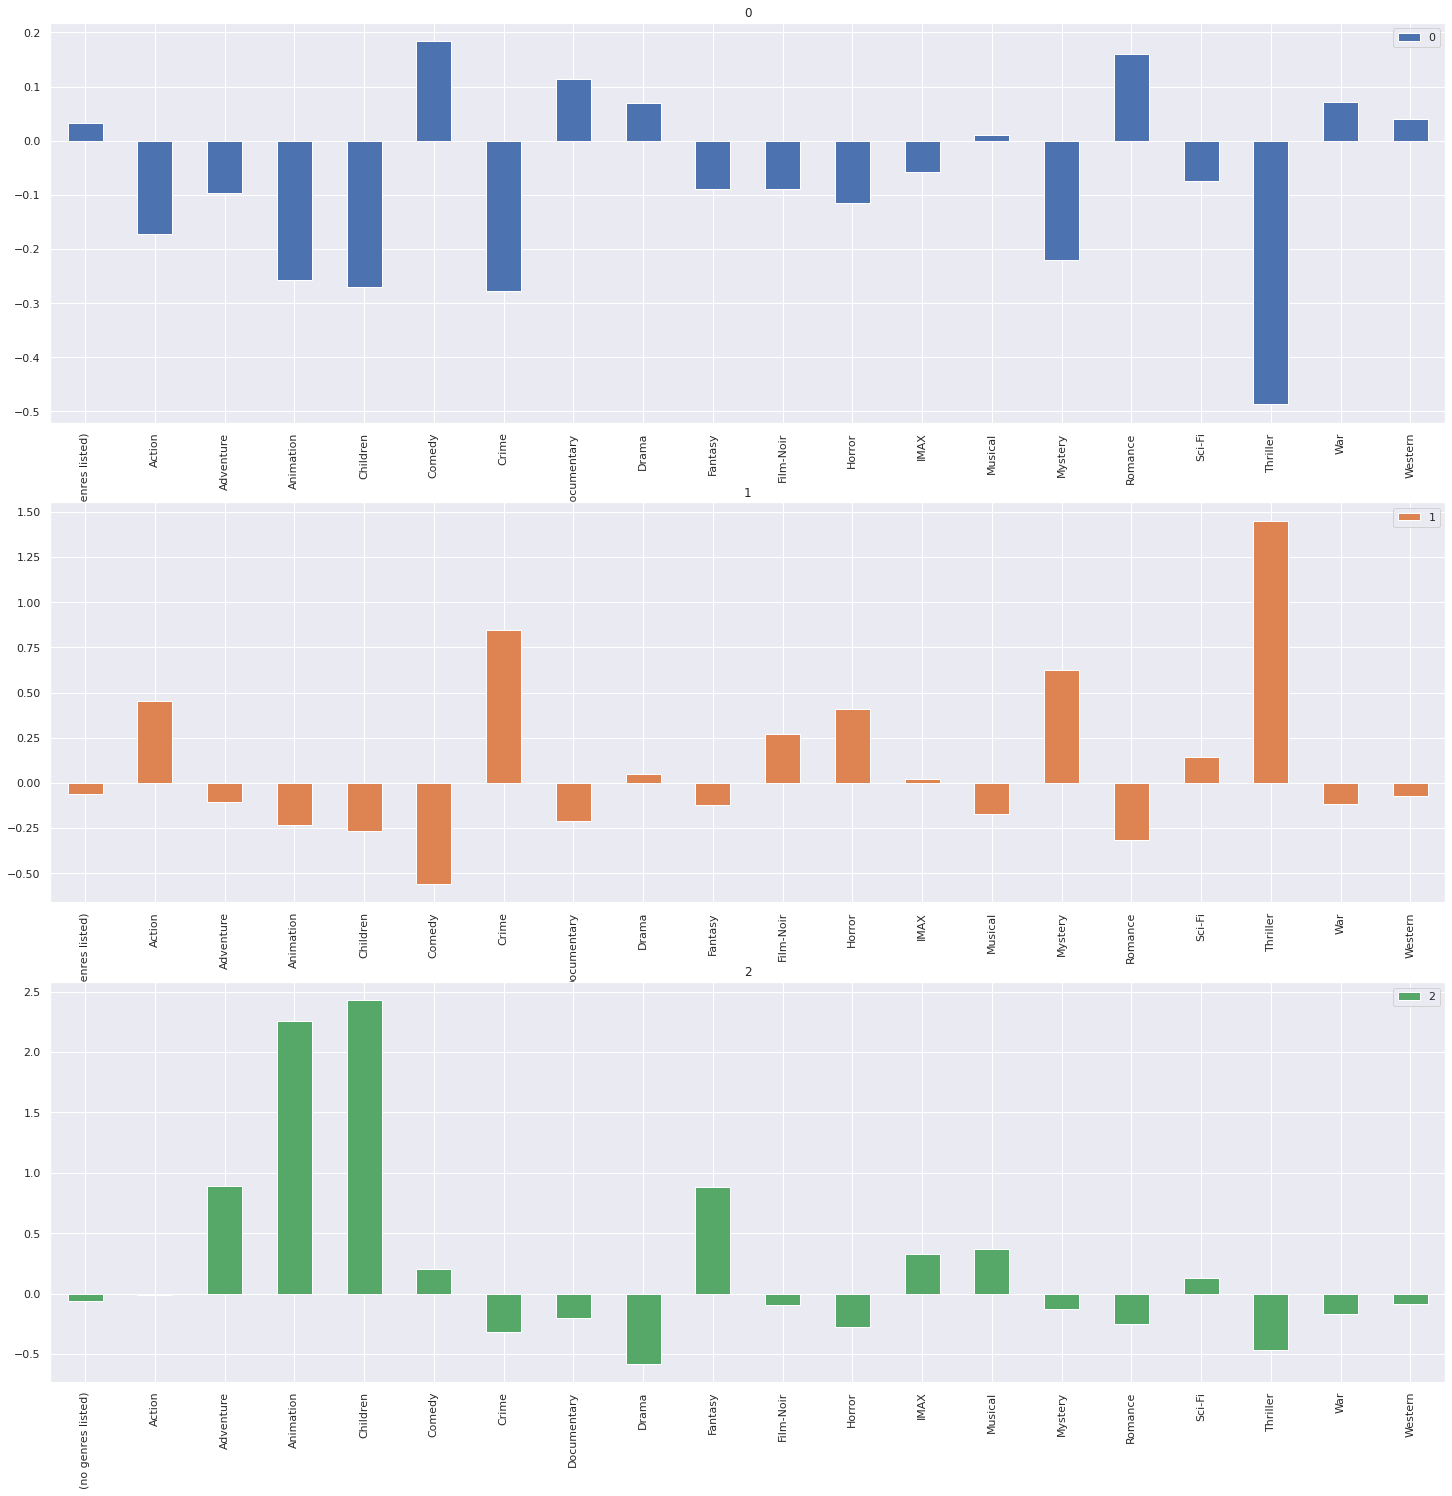

In [70]:
grupos.transpose().plot.bar(subplots=True, figsize=(25,25),
                sharex=False)

In [71]:
#realizar filtros nos dataframes
grupo = 0 
filtro = modelo.labels_==grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,title,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1742,2337,Velvet Goldmine (1998),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6913,64197,Hunger (2008),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2904,3894,Solas (1999),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7190,72479,"Messenger, The (2009)",Drama|Romance|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4566,6785,Seven Brides for Seven Brothers (1954),Comedy|Musical|Romance|Western,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1
5402,25750,Sherlock Jr. (1924),Comedy|Fantasy|Romance,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4084,5836,Houseboat (1958),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4590,6818,Come and See (Idi i smotri) (1985),Drama|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4646,6945,My Architect: A Son's Journey (2003),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1996,2656,Tarantula (1955),Horror|Sci-Fi,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [45]:
#A função make_blobs nos retorna os xn... e o valor de y, isto é, as variáveis independentes e a variável dependente.
from sklearn.datasets import make_blobs
#duas dimensões, falamos que o número de features (n_features) deve ser igual a 2 com 1000 exemplos (n_samples) de testes e para termos os mesmos dados, vamos setar o parâmetro de aleatoriedade como 7 (random_state):
dados, _ = make_blobs(n_samples=1000, n_features=2, random_state=7) #Como o make_blobs nos retorna um par de dados (x, y) e não queremos o y, usamos o underscore (_) para ignorar o retorno dessa variável.
# transformar estes dados em um DataFrame do pandas e renomear as colunas para coluna1 e coluna2.
dados = pd.DataFrame(dados, columns=['coluna1', 'coluna2'])
dados.head()


,coluna1,coluna2
0,9.829632,0.763094
1,-9.723548,4.100788
2,10.403457,1.761671
3,-2.253417,4.660486
4,13.059859,-0.004112


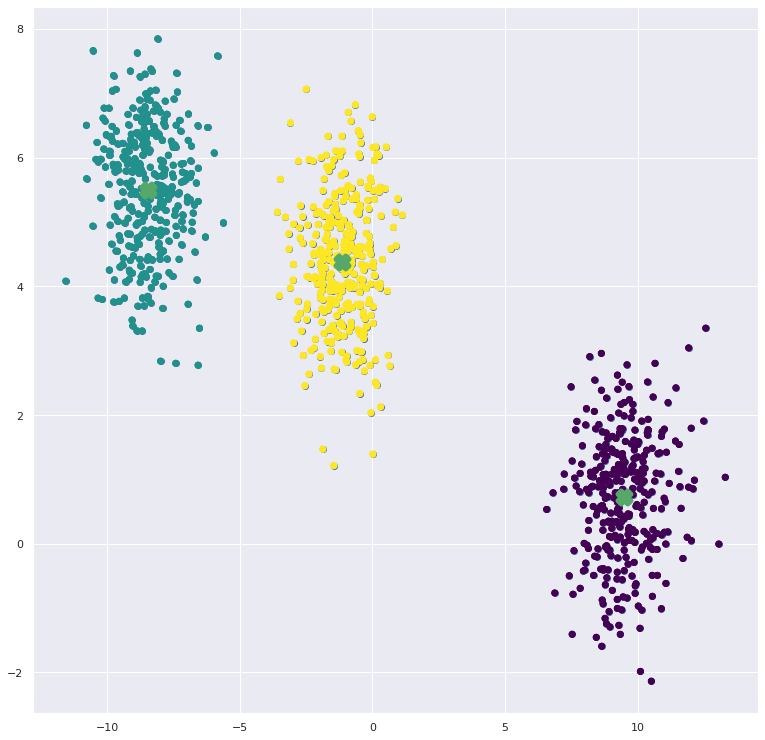

In [46]:
 #cruzamos os dados das colunas e plotamos a distribuição.
 import matplotlib.pyplot as plt

plt.scatter(x=dados.coluna1, y=dados.coluna2)
#Pedimos ao KMeans para criar um modelo com 3 grupos e segmentar os nossos dados baseado no modelo criado.
modelo = KMeans(n_clusters=3)
grupos = modelo.fit_predict(dados)
#Plotamos os dados segmentados identificando os grupos com cores distintas (c=grupos) e vívidas (cmap='viridis').
plt.scatter(x=dados.coluna1, y=dados.coluna2, 
            c=grupos,
           cmap='viridis')
#Geramos pontos centrais para os grupos, chamados centroides, e plotamos novamente nossos grupos.
centroides = modelo.cluster_centers_
plt.scatter(dados.coluna1, dados.coluna2,
            c=grupos,
           cmap='viridis')
#visualizar os centróides
#O pandas nos devolve os centroides em forma de matriz, então montamos a localização cartesiana pegando a posição 0 para o eixo x (centroides[:,0]) e a posição 1 para o eixo y (centroides[:,1]) . Também podemos estilizar a representação do nosso centroide, marcando como um X (marker='X'), setando o tamanho (s=169), a largura da linha (linewidths=5), cor (color=g) e a hierarquia de aparição (zorder=8).
plt.scatter(centroides[:, 0], centroides[:, 1],
           marker='X', s=169, linewidths=5,
           color='g', zorder=8)



In [72]:
#Aula 3 - Vendo os centroides

#Como reduzir a dimensão com TSNE
#Como plotar um gráfico de pontos com o seaborn
#Como visualizar os centróides
#Como realizar filtros nos dataframes

from sklearn.manifold import TSNE #Reduz a dimensionalidade
#reduzir a dimensão com TSNE
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao


array([[ 27.200253 , -42.35714  ],
       [-23.372795 ,   2.1661193],
       [ -3.8900142,  41.10478  ],
       ...,
       [ -5.4099183,  -7.416519 ],
       [  8.189409 , -37.30211  ],
       [ 11.325486 ,  21.929218 ]], dtype=float32)

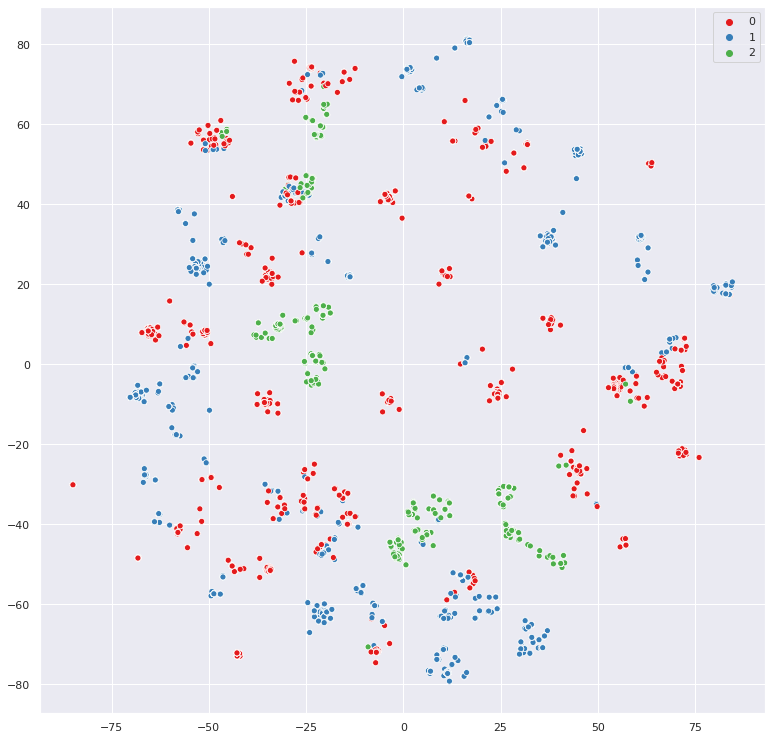

In [73]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})

sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a5c387240>,
      dtype=object)

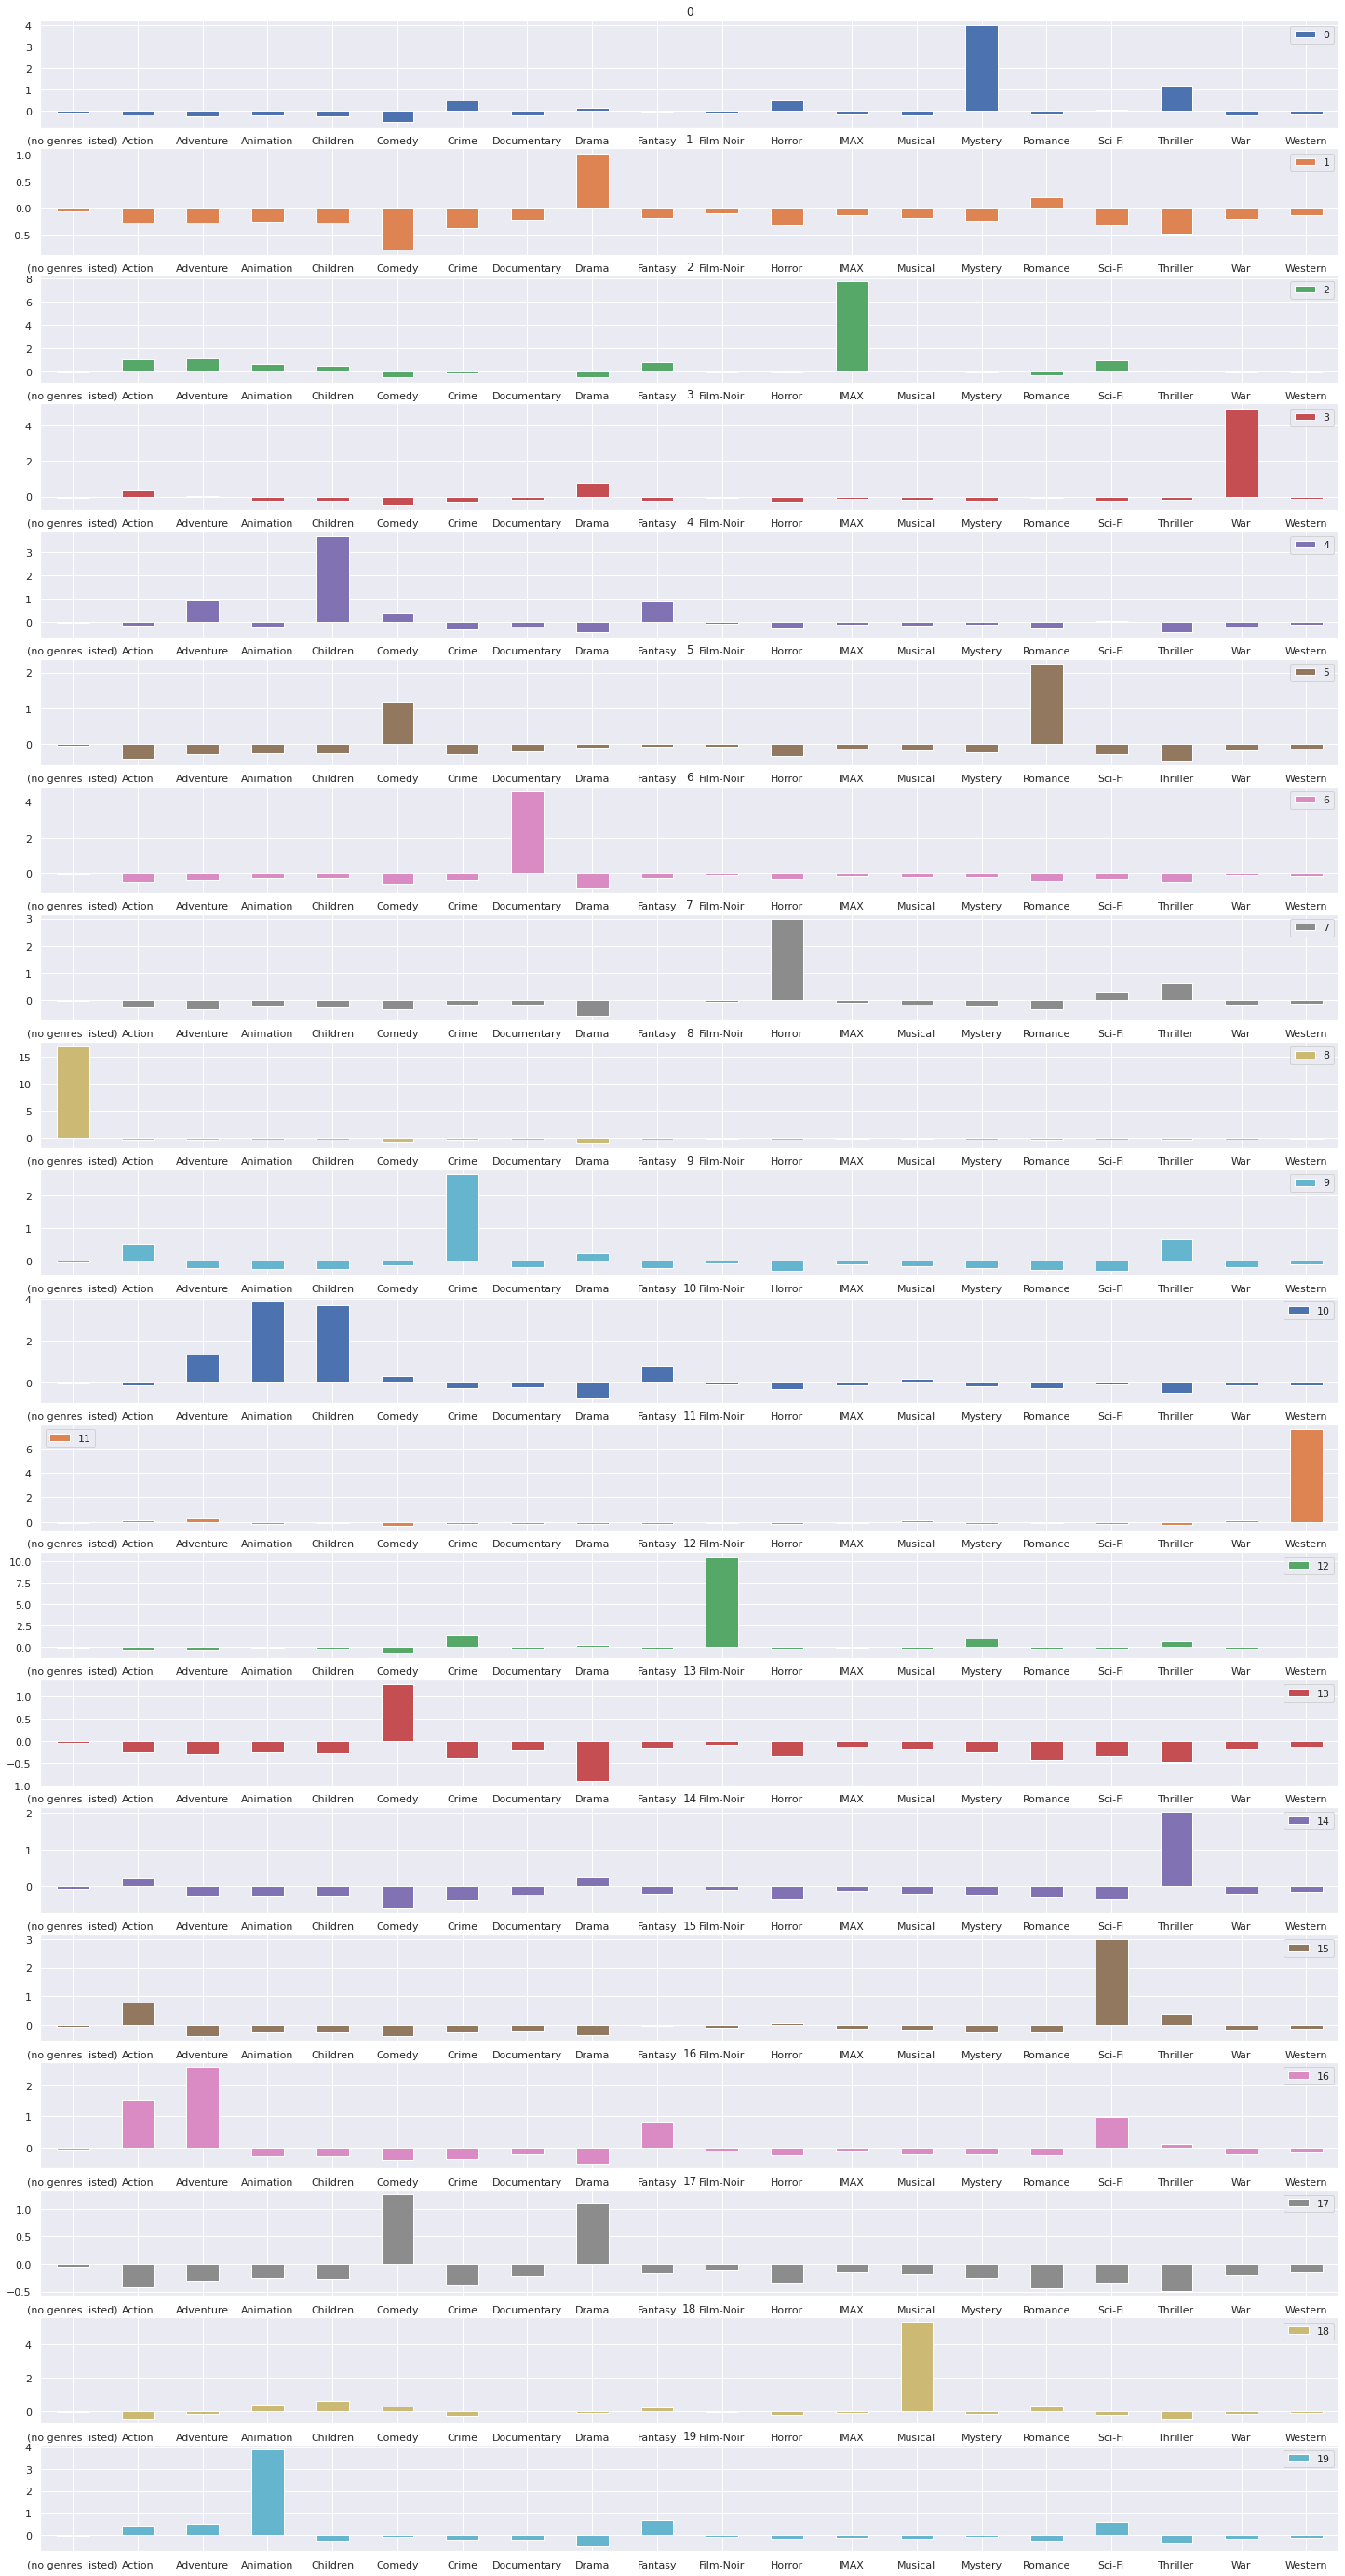

In [92]:
#Aula 4 - Escolhendo os Grupos
#Qual o problema de termos muitos ou poucos grupos
#Como é calculado o erro do modelo
#O que é o elbow method
#Como otimizar o número de clusters para o K-Means

#otimizar numero de grupos https://www.naftaliharris.com/blog/visualizing-k-means-clustering/
#gaussian mixure
def Kmeans(numero_de_clusters, generos):
  modelo = KMeans (n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]


In [98]:
Kmeans(20, generos_escalados)

[20, 54604.9025660843]

In [97]:
Kmeans(3, generos_escalados)

[3, 166103.89188928014]

In [113]:
resultado = [Kmeans(numero_de_grupos,generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179484.10364334713],
 [3, 167085.286878416],
 [4, 157478.96011779568],
 [5, 146919.49034045078],
 [6, 137152.28975632822],
 [7, 128232.53672769059],
 [8, 118858.78676764411],
 [9, 111854.04856604949],
 [10, 100582.91388464965],
 [11, 93108.12580537223],
 [12, 86710.58090434551],
 [13, 79727.50121061377],
 [14, 73979.32936947275],
 [15, 69514.9429767112],
 [16, 65468.95174384812],
 [17, 62277.154952949255],
 [18, 58787.619873051495],
 [19, 56651.87588394635],
 [20, 55567.644322520384],
 [21, 53229.52019125848],
 [22, 51486.378389626145],
 [23, 50897.631359673614],
 [24, 49294.506718289624],
 [25, 48062.713394519385],
 [26, 46472.04335561803],
 [27, 44774.78097610076],
 [28, 44954.464343953434],
 [29, 43290.48232381603],
 [30, 42896.085810053795],
 [31, 41960.331409047074],
 [32, 40666.41971256685],
 [33, 40323.13124424743],
 [34, 38349.51649734007],
 [35, 39558.20275703052],
 [36, 38112.83256218835],
 [37, 37396.962397515905],
 [38, 36536.715244241495],
 [39, 36055.

In [114]:
resultado = pd.DataFrame(resultado, columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179484.103643
2,3,167085.286878
3,4,157478.960118
4,5,146919.490340
5,6,137152.289756
6,7,128232.536728
7,8,118858.786768
8,9,111854.048566
9,10,100582.913885


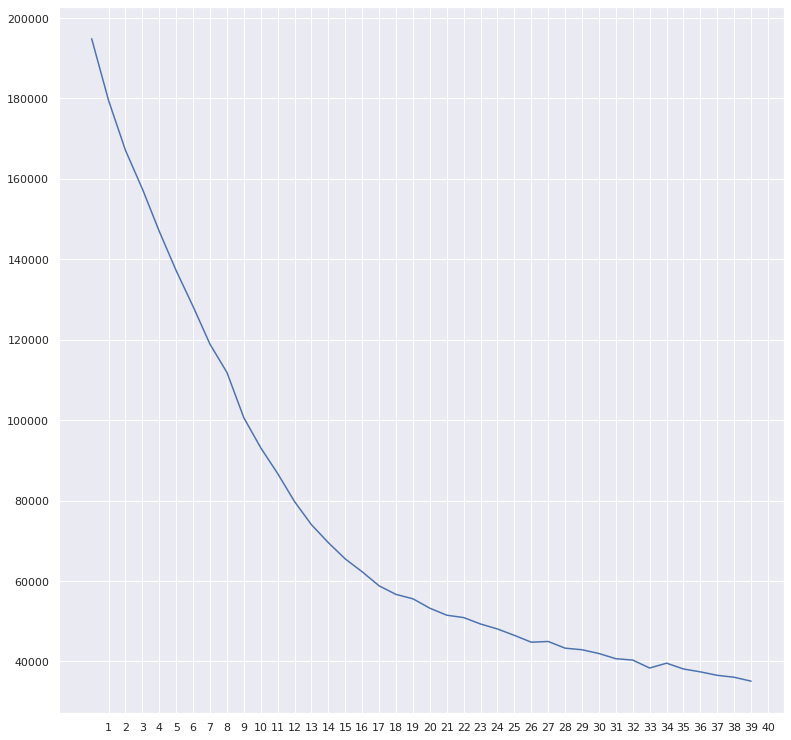

In [115]:
resultado.inertia.plot(xticks=resultado.grupos)

In [ ]:
#Podemos ver que o ponto de quebra no gráfico foi próximo ao número 17, logo, esse é o número de clusters que otimiza nosso modelo. Podemos rodar um novo modelo com 17 grupos e mostrar seus centroides:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [112]:
#realizar filtros nos dataframes
grupo = 16
filtro = modelo.labels_==grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,title,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7631,87520,Transformers: Dark of the Moon (2011),Action|Adventure|Sci-Fi|War|IMAX,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
7774,91630,Mission: Impossible - Ghost Protocol (2011),Action|Adventure|Thriller|IMAX,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3285,4445,T-Rex: Back to the Cretaceous (1998),Adventure|Documentary|IMAX,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
8351,108689,"I, Frankenstein (2014)",Action|Fantasy|Sci-Fi|IMAX,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
7212,72998,Avatar (2009),Action|Adventure|Sci-Fi|IMAX,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
8036,98203,"Twilight Saga: Breaking Dawn - Part 2, The (2012)",Adventure|Drama|Fantasy|Romance|IMAX,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0
6731,59037,Speed Racer (2008),Action|Children|Sci-Fi|IMAX,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
7915,95307,Rock of Ages (2012),Comedy|Drama|Musical|IMAX,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0
8053,98809,"Hobbit: An Unexpected Journey, The (2012)",Adventure|Fantasy|IMAX,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
6521,53996,Transformers (2007),Action|Sci-Fi|Thriller|IMAX,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0


In [116]:
#Aula 5 - Agrupamento Hierárquico

#O que é o agrupamento hierárquico
#Como utilizar o algoritmo AgglomerativeClustering da sklearn
#Como calcular a matriz de distâncias de uma amostra
#Como plotar um dendrograma

#Agrupamento por particionado kmeans

from sklearn.cluster import AgglomerativeClustering

In [119]:
modelo = AgglomerativeClustering(n_clusters=17)
#treinar o modelo fit_predict para retornar os labels
grupos = modelo.fit_predict(generos_escalados)
#imprime os grupos
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [121]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 20.540703 ,  42.986332 ],
       [ 57.83314  ,  -4.825128 ],
       [-34.70611  , -21.864576 ],
       ...,
       [ 12.4845   ,  20.428625 ],
       [ 20.045568 ,  -8.990266 ],
       [-17.536001 ,  -1.1456295]], dtype=float32)

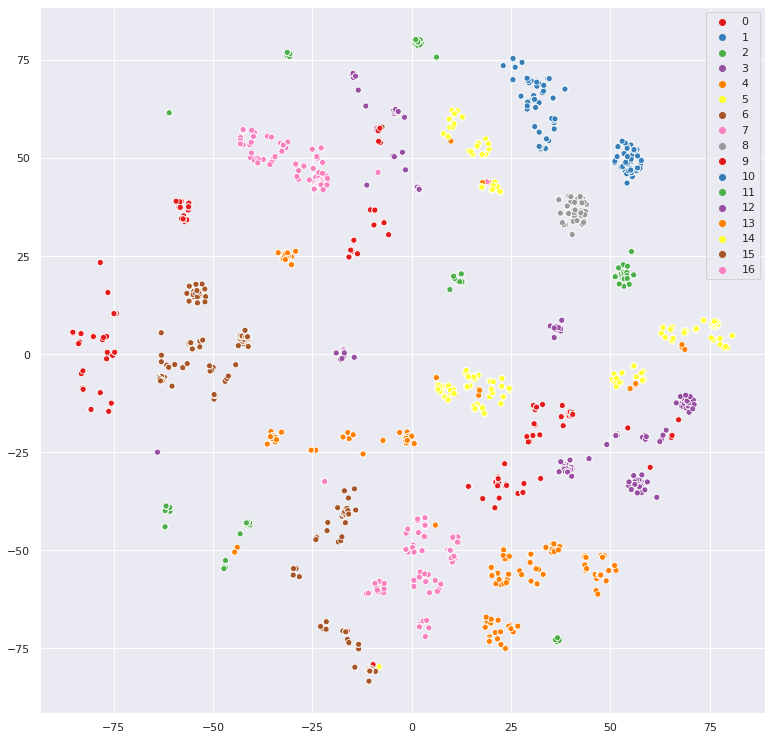

In [127]:
sns.scatterplot(x=visualizacao[:, 0],
                y=visualizacao[:, 1],
                hue=grupos,
                palette=sns.color_palette('Set1',17)) #17 é a qtde de grupos do dataset, se deixar em branco ele pinta defaul com 4 segmentacoes

In [132]:
#agrupamento por hierarquia
#gráfico dendograma (arvore)
from scipy.cluster.hierarchy import dendrogram, linkage #calcula a matriz de distäncia entre os generos romance está longe de terror e proximo de drama

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a5321c630>,
      dtype=object)

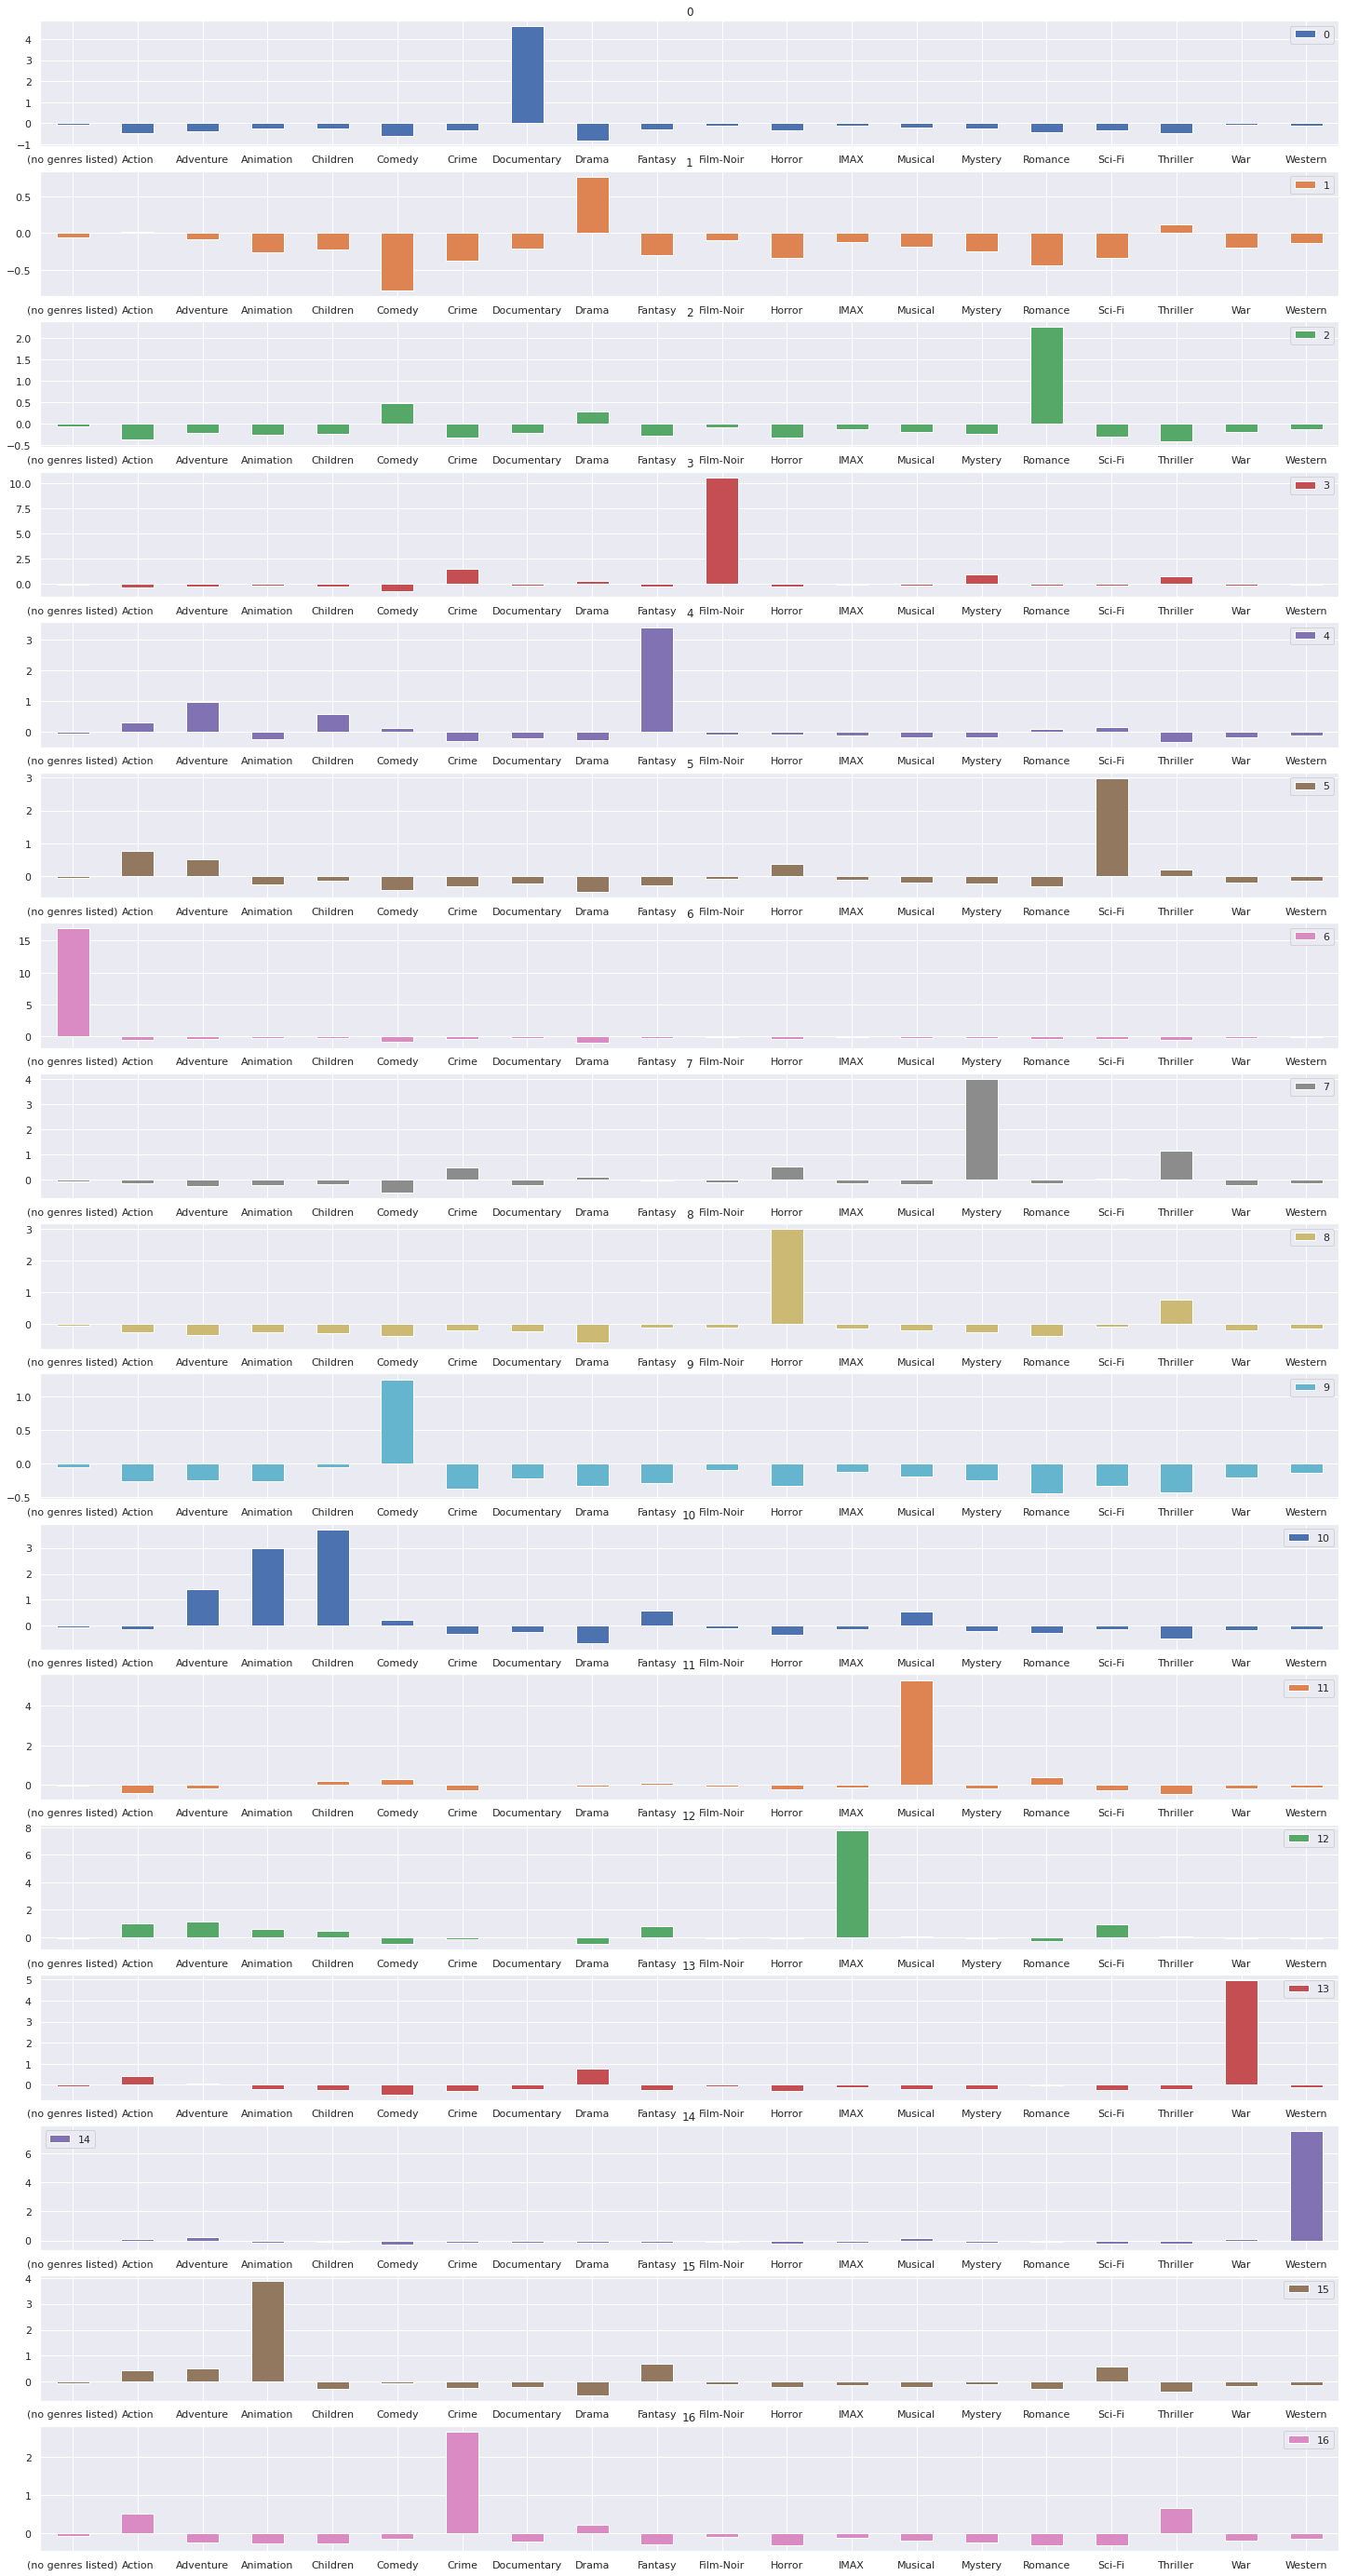

In [133]:
modelo = KMeans(n_clusters=17)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [134]:
#Matriz de distancia
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 1.        ,  9.        ,  2.42166162,  2.        ],
       [ 2.        , 17.        ,  2.88678954,  3.        ],
       [16.        , 18.        ,  3.24745806,  4.        ],
       [ 8.        , 19.        ,  3.71432473,  5.        ],
       [ 5.        , 20.        ,  3.76993621,  6.        ],
       [ 4.        , 21.        ,  4.19996014,  7.        ],
       [10.        , 15.        ,  4.35069131,  2.        ],
       [ 7.        , 22.        ,  4.63233369,  8.        ],
       [23.        , 24.        ,  4.67454752, 10.        ],
       [ 0.        , 25.        ,  5.14014132, 11.        ],
       [13.        , 26.        ,  5.20453175, 12.        ],
       [11.        , 27.        ,  5.67879038, 13.        ],
       [14.        , 28.        ,  7.82349658, 14.        ],
       [12.        , 29.        ,  8.36451056, 15.        ],
       [ 3.        , 30.        , 10.8157302 , 16.        ],
       [ 6.        , 31.        , 17.0604573 , 17.        ]])

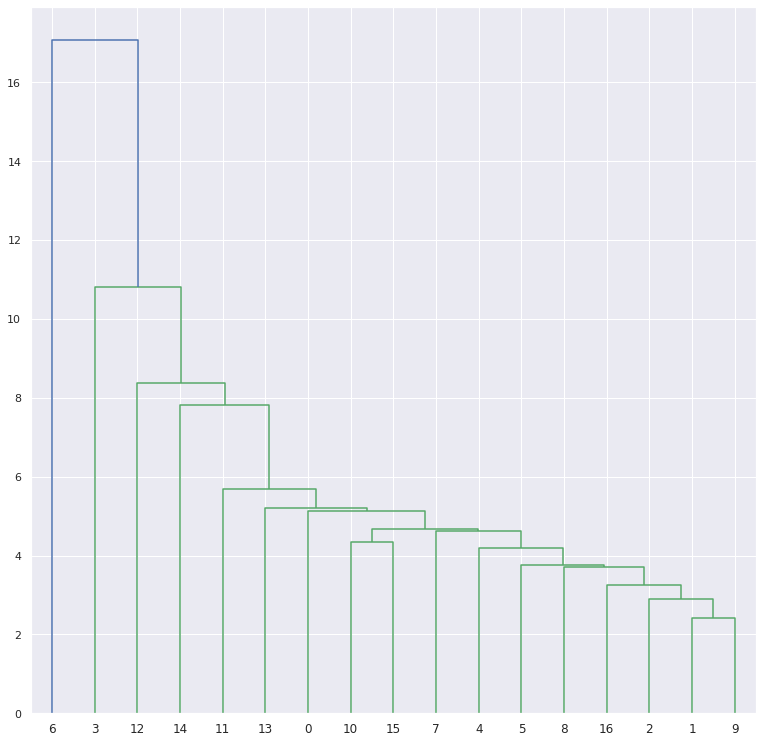

In [135]:
dendrograma = dendrogram(matriz_de_distancia)
#pelo dendrogama podemos dizer que o filme do grupo 1 está proximo do grupo 9

In [137]:
#agrupamento por densidade (qdo nao temos os cluters para agrupar) https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/
#Vamos pegar os mesmos blobs que geramos no exercício de visualizar os centroides no K-Means
#importar a classe DBSCAN do módulo de cluster.
from sklearn.cluster import DBSCAN

#criar o modelo e falar para ele agrupar os dados
modelo = DBSCAN()
grupos = modelo.fit_predict(dados)


#Podemos ver que ele conseguiu agrupar em três grupos distintos, mas o que são esses pontos que não estão nas cores dos grupos?
#Esses são os outliers. São os pontos que o DBSCAN achou que não pertenciam aos grupos que estavam próximos.